# AOS 111 week 1

## Goals
- [ ] Linear regression
- [ ] Understand normal equation
- [ ] Polynomial regression
- [ ] Understand overfitting

Created by Donglai Ma, August 2020



## Linear regression

*A set of examples and exercises for understanding the linear regression model*


### Create a nonlinear dataset

Here we will be learning a nonlinear model. In the real world, the data does not typically conform to a linear function, so we need to create a slightly nonlinear function to generate our 1D data set and add some noise.

We start with a sinusoidal function which we will try to approximate using polynomial regression.

#### Noise in the dataset
numpy uses the 'random' function to generate random samples, here we use [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) to add our noise. The random samples follow a normal (Gaussian) distribution.

#### Training dataset and test dataset
We want the model to generalize well to data it has not seen previously,so we seprate the total data, make regression on the training set and evaluate on the test set.
One easy way is to use sklearn function: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

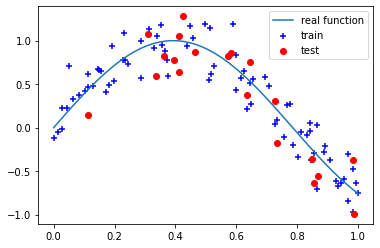

In [15]:
# Prepare the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Prepare the function of 'fake' dataset
m = 100  # number of total samples

test_size = 0.2  # test dataset ~ 20%

x = np.random.rand(m)  # get random data(x_0,x_1,..., x_{m-1})

f = np.sin(4*x)

noise = np.random.normal(0, 0.2, x.shape)  # add some noise

y = f + noise

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# Plot the result
p_train = plt.scatter(x_train, y_train, marker='+', c='b', label='train')
p_test = plt.scatter(x_test, y_test, marker='o', c='r', label='test')

x_line = np.linspace(0, 1)
p_real = plt.plot(x_line, np.sin( 4*x_line),
                  label='real function')  # plot the real sin(4x)
plt.legend()
plt.show()

### Linear model

$\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\boldsymbol{\theta} \cdot \boldsymbol{x}=\theta_{0} x_{0}+\theta_{1} x_{1}+\ldots+\theta_{i} x_{i}+\ldots+\theta_{n} x_{n}=\boldsymbol{\theta}^{T} \boldsymbol{x}$


$\hat{y}$ is the predicted value\
$n$ is the number of features (1 in the linear model case)\
$x_i$ is the $i^{th}$ feature value ($x_0 = 1$ always)\
$\theta_i$ is the $i^{th}$ parameter value ($\theta_0$ is the bias term)\
$\boldsymbol{x}$ is the feature vector\
$\boldsymbol{\theta}$ is the parameter vector\
$h_{\boldsymbol{\theta}}$ is the hypothesis function with model parameters $\boldsymbol{\theta}$\
$\boldsymbol{\theta}^{T}$ is transpose of (column vector) $\boldsymbol{\theta}$





#### Create the design matrix 

We have one feature in this dataset, so for the linear model:
$\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\boldsymbol{\theta} \cdot \boldsymbol{x}=\theta_{0} x_{0}+\theta_{1} x_{1}=\boldsymbol{\theta}^{T} \boldsymbol{x}$

Now we create the design matrix $\mathbf{X}$ so $\mathbf{X} \boldsymbol{\theta}=\mathbf{Y}$


##### Tips: The dimension of the array is important
$\mathbf{X}$ is the matrix consists of the training samples $x^{i}$, and $\mathbf{Y}$ is the matrix of the model outputs
$$  \left[\begin{matrix}
 1      & x_1^{(1)}    & \cdots & x_n^{(1)}      \\
 1      & x_1^{(2)}    & \cdots & x_n^{(2)}      \\
 \vdots & \vdots       & \vdots & \vdots         \\
 1      & x_1^{(m)}    & \cdots & x_n^{(m)}      \\
\end{matrix}\right] \cdot
\left[\begin{matrix}
\theta_0 \\ \theta_1 \\\vdots \\ \theta_n
\end{matrix}
\right]  = 
\left[\begin{matrix}
y^{(1)} \\ y^{(2)} \\\vdots \\ y^{(m)}
\end{matrix}
\right] 
$$
In this problem, m is the numbers of training samples, and n = 1.
So the shape of X is (m,2), the shape of theta is (2,1) and the shape of Y is (m,1)

In [16]:
# Create that design matrix:
# What we need to do is add x_0 which usually is a column of 1's and reshape the matrix


##############################
#Your function start here
def addfeature(x):
    """
    @x : array of training samples
    @return: array of X 
    """
    m = len(x)
    x_1 = x.reshape(m, 1)
    x_0 = np.ones((m, 1))

    X_array = np.hstack((x_0, x_1))

    return X_array


##############################

# Test your function

X_train = addfeature(x_train)
X_test = addfeature(x_test)

print(X_test.shape)
print(X_test)

(20, 2)
[[1.         0.41043333]
 [1.         0.64360069]
 [1.         0.394788  ]
 [1.         0.72711764]
 [1.         0.73386165]
 [1.         0.30985335]
 [1.         0.8543422 ]
 [1.         0.36248789]
 [1.         0.98302212]
 [1.         0.46572234]
 [1.         0.57187923]
 [1.         0.11441291]
 [1.         0.41215101]
 [1.         0.85010667]
 [1.         0.4235299 ]
 [1.         0.86703118]
 [1.         0.33589239]
 [1.         0.98575801]
 [1.         0.63524411]
 [1.         0.58129337]]


#### In-Class Coding: PART A: Solving the normal equation

The estimated value of ${\theta}$ is 
$$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{Y}$$

In [17]:
# Create a funtion to calculate theta
# Remember how to calculate the inverse and transpose of matrix


##############################
#Your function start here
def solvenormal(X, Y):
    """
    @X : design matrix X
    @Y : design matrix Y
    @return: array of theta
    """
    theta = 99999.9999
    return theta


##############################

X = np.matrix(X_train)
Y = y_train.reshape(len(y_train), 1)
theta_hat = solvenormal(X, Y)
print(theta_hat)

[[ 0.90996317]
 [-1.1409549 ]]


#### Check the model performance

We first plot the scatter of the training data set, then plot the model function to check the performance

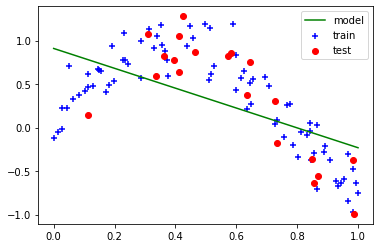

In [18]:
# Add feature to x_plot and make it to the matrix
x_plot = np.linspace(0, 1)
x_plot_vec = addfeature(x_plot)

p_train = plt.scatter(x_train, y_train, marker='+', c='b', label='train')
p_test = plt.scatter(x_test, y_test, marker='o', c='r', label='test')
p_function = plt.plot(x_plot,
                      np.matrix(x_plot_vec) * theta_hat,
                      'g',
                      label='model')

plt.legend()
plt.show()

## Polynomial regression

$\hat{y}=h_{\boldsymbol{\theta}}(\boldsymbol{\phi})=\boldsymbol{\theta} \cdot \boldsymbol{\phi}=\theta_{0} \phi_{0}+\theta_{1} \phi_{1}+\ldots+\theta_{i} \phi_{i}+\ldots+\theta_{n} \phi_{n}=\boldsymbol{\theta}^{T} \boldsymbol{\phi}$

In this problem we set $\phi_i = x_1^i $


In [19]:
# Similar to addfeature
# You could see the robustness of the code is important
def addpoly(x, n):
    """
    @x: array of training samples
    @n: order of the input  
    @return: design matrix X 
    """

    x_vec = np.zeros((len(x), n + 1))
    for i in range(n + 1):
        x_vec[:, i] = x**i
    return x_vec


# Test of the addpoly function
test_poly = addpoly(x_test, 4)
print(test_poly.shape)

(20, 5)


Now we would like to check performance of different order, and the expression of the function.

Remember $$sin(4x)=4x-\frac{(4x)^{3}}{3 !}+\frac{(4x)^{5}}{5 !}-\frac{(4x)^{7}}{7 !}+\cdots$$

In [20]:
4**7/np.math.factorial(7)

3.250793650793651

In [21]:
# Based on your result theta, output an expression of the function you learned.
# Remember Phi_i = x1^i


def outexpression(theta):
    """
    @theta: The theta hat values,remember that theta is a matrix
    #return: output an expression of the theta
    """
    theta_array = np.array(theta).squeeze()

    expression = 'y = '
    for i in range(len(theta_array) - 1, -1, -1):
        expression_new = "{:.2f}" + "*x^" + "{:.0f}"

        expression += expression_new.format(theta_array[i], i)
        if i is not 0:
            expression += '+'
    return expression


# Test the expression
outexpression(theta_hat)

'y = -1.14*x^1+0.91*x^0'

y = -1.14*x^1+0.91*x^0
y = 3.46*x^3+-10.18*x^2+5.98*x^1+-0.04*x^0
y = 8.06*x^5+-14.64*x^4+10.13*x^3+-9.57*x^2+5.32*x^1+0.00*x^0
y = 233.00*x^7+-909.14*x^6+1416.86*x^5+-1113.40*x^4+459.79*x^3+-100.49*x^2+12.77*x^1+-0.13*x^0
y = 4007.44*x^9+-18229.90*x^8+34893.69*x^7+-36594.79*x^6+22955.13*x^5+-8816.50*x^4+2029.88*x^3+-265.34*x^2+19.91*x^1+-0.20*x^0
y = -37754.44*x^11+203486.94*x^10+-468770.86*x^9+601235.02*x^8+-467863.88*x^7+224761.61*x^6+-64004.22*x^5+9153.53*x^4+-128.27*x^3+-132.87*x^2+16.76*x^1+-0.19*x^0
y = 10248.40*x^13+-71353.23*x^12+192386.93*x^11+-247955.79*x^10+123955.10*x^9+60450.97*x^8+-121781.11*x^7+70731.87*x^6+-17477.47*x^5+22.18*x^4+953.93*x^3+-200.94*x^2+18.50*x^1+-0.20*x^0
y = 65946.88*x^15+-410584.94*x^14+1081704.25*x^13+-1561698.50*x^12+1336539.56*x^11+-700497.62*x^10+275416.12*x^9+-175574.19*x^8+160214.50*x^7+-107809.23*x^6+48280.46*x^5+-14414.47*x^4+2774.32*x^3+-319.27*x^2+21.59*x^1+-0.21*x^0


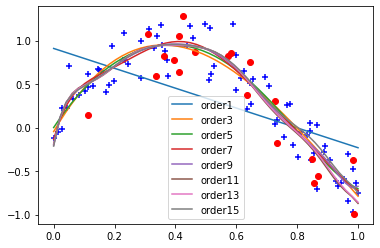

In [22]:
# IN CLASS CODING: PART B
#
# Show different order results
order_max = 15
for i in range(1, order_max + 1, 2):
    %   
    % 1. CREATE THE DESIGN MATRIX WITH COLUMNS REPRESENTING HIGHER ORDER POLYNOMIAL TERMS
    % phi_vec = ...
    %  
    % 2. SOLVE THE NORMAL EQUATION FOR THE MODEL PARAMETER VECTOR
    % theta_i = ...
    %
    % 3. PRINT THE POLYNOMIAL EXPRESSION USING THE OUTEXPRESSION FUNCTION ABOVE
    % print(...)
    % 
    %
    x_plot_vec = addpoly(x_plot, i)
    plt.plot(x_plot, np.matrix(x_plot_vec) * theta_i, label='order%d' % i)

p_train = plt.scatter(x_train, y_train, marker='+', c='b')
p_test = plt.scatter(x_test, y_test, marker='o', c='r')
plt.legend()
plt.show()

You can see that those coefficients turn out to be very large, and we will talk about how to solve this next week.